# **Study Case**
Create model K-Means with prerequisites:
1. Use 'Mall_Customer.csv'
2. Select Features for clustering(min 2 features)
3. Create Model K-Means with best K
4. Create implementatio SOM model for segmentation other that Lenna image 

## **Import Library**

In [13]:
from colorsys import yiq_to_rgb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Feature Selection And Standardization Data**

In [14]:
# Select Annual Income (k$) and Spending Score (1-100)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardization data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Find Best K with Elbow Method**

E:\anaconda\envs\Week1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\envs\Week1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\envs\Week1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\envs\Week1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

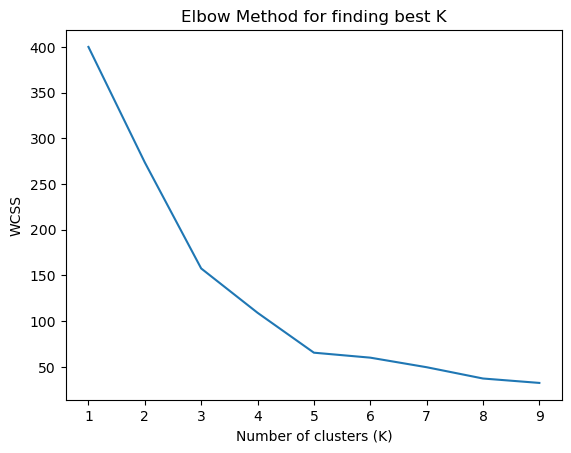

In [15]:
wcss = []  # within-cluster sum of squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# show plot Elbow Method
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method for finding best K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

### **Create Model K-Means**

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

E:\anaconda\envs\Week1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### **Visualize the clusters**

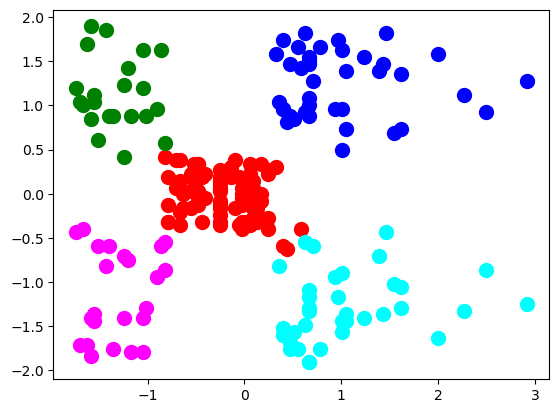

In [17]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.show()

### **Implementatio SOM model for segmentation other that Lenna image**

E:\anaconda\envs\Week1\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


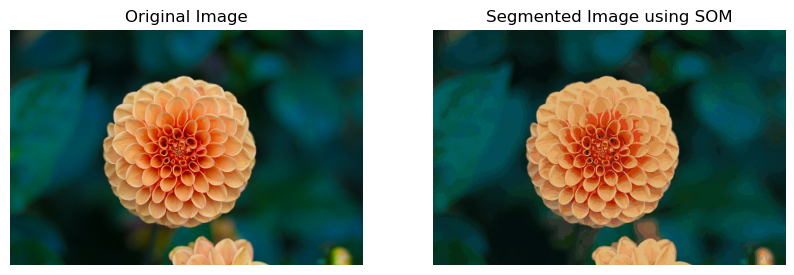

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from minisom import MiniSom

# 1. Create image samples
image = load_sample_image("flower.jpg") 
image = np.array(image, dtype=np.float64) / 255.0  
w, h, d = image.shape
pixels = np.reshape(image, (w * h, d))  

# 2. Create SOM model
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)  
som.random_weights_init(pixels)
som.train_random(pixels, 100)  

# 3. Clustering pixels using SOM
qnt = som.quantization(pixels)  

# 4. Create new image using the clustered pixels
segmented_image = np.reshape(qnt, (w, h, d))

# 5. Show the original and segmented image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmented Image using SOM")
plt.axis('off')
plt.imshow(segmented_image)

plt.show()